# Data summary

Now that we have a procedure to normalize the data, we are able to combine all the experiments (done on different days, by different people, but with same grid design) into the same histogram. In this notebook, we collect the "ultimate" histogram of this project.

In [34]:
import os
import pandas as pd
from myimagelib.myImageLib import readdata
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np

## 1 model_01_S

We have two designs: disk-based and minimal, corresponding to model_01 and model_11. However, since the channel structures are exactly the same, we consider them the same model. The subfolders that are concerned in this section: ["05_july_2022, "04 nov 2022", "14 dec 2022", "15 dec 2022", "28_december_2022", "17 jan 2023", "19 jan 2023"].

Note: "04 nov 2022" and "17 jan 2023" were removed due to bad packing and low activity.

In [35]:
dates = ["05_july_2022", "14 dec 2022", "15 dec 2022", "28_december_2022", "19 jan 2023"]
main_folder = r"A:\SYMMETRIC"

In [36]:
# some statistics
for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        total += len(flowrate)
    print("{0}: {1:d} videos, {2:d} points".format(date, num+1, total))

05_july_2022: 16 videos, 9600 points
14 dec 2022: 2 videos, 7198 points
15 dec 2022: 4 videos, 14396 points
28_december_2022: 7 videos, 4200 points
19 jan 2023: 7 videos, 25193 points


### 1.1 3-panel histograms

We want to compare the flow histogram with theoretical energy landscapes. The predictions is conveniently visualized in 2D histograms. For our 3-channel bifurcation experiment, 3 histograms can be made, namely (A, B), (A, C) and (B, C). In this section, we implement the code that plot these 3 histograms in 3 panels. We term this type of visualization "3-panel histograms".


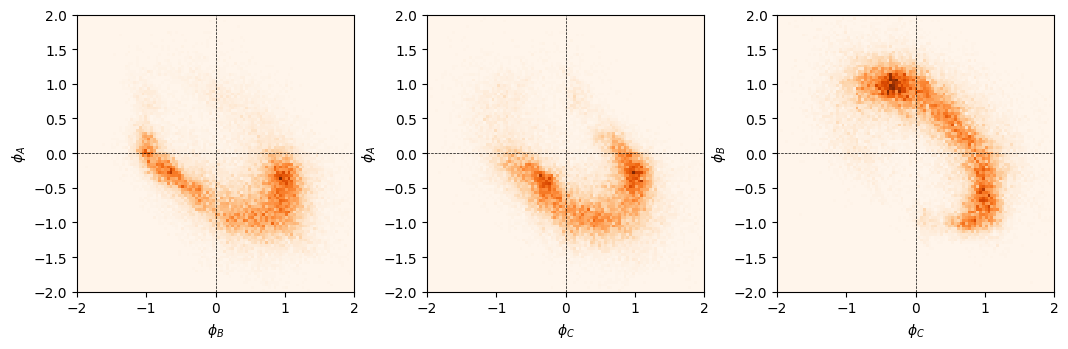

In [37]:
window_size = 100 # frames, 1 frame = 0.5 s


# colors = plt.cm.get_cmap("tab10")
# video_colors = plt.cm.get_cmap("winter", len(files))

fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100)
fr_list = []
lim = 2

for date in dates:
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
    H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
    ax[num].imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
    ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax[num].set_xlim([-lim, lim])
    ax[num].set_ylim([-lim, lim])
    ax[num].set_xlabel("$\phi_{}$".format(i2))
    ax[num].set_ylabel("$\phi_{}$".format(i1))

### 1.2 1-panel histogram

A single combination between two channels does not recover the predicted ellipse. It might look better if we superpose all the 3 possible combinations. We will try (A, B), (B, C), (C, A).

NOTE: 

Text(0, 0.5, '$\\phi_1$')

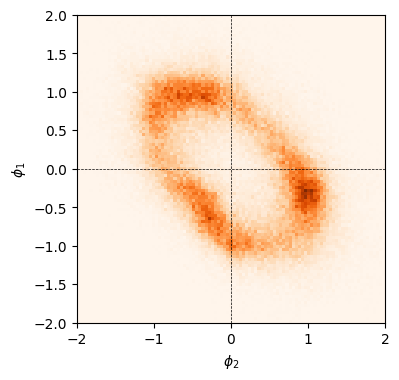

In [38]:
lim = 2
one_panel_list = []
for i1, i2 in (("C", "B"), ("B", "A"), ("A", "C")):
    tmp = pd.DataFrame()
    tmp["phi-1"] = combined[i1] / combined["normalizer"]
    tmp["phi-2"] = combined[i2] / combined["normalizer"]
    one_panel_list.append(tmp)
one_panel = pd.concat(one_panel_list)

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
H, xedges, yedges = np.histogram2d(one_panel["phi-1"], one_panel["phi-2"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax.imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.set_xlabel("$\phi_{}$".format(2))
ax.set_ylabel("$\phi_{}$".format(1))

I'm not sure how legit this "stacking" is. It is clear that the three flow rates are not independent. They must satisfy:

$$
\phi_A + \phi_B + \phi_C = 0
$$

By putting all the possible bifurcation combinations (AB, BC, CA) in the same plot, we add more points to the histogram. For example, if we know 

$$
\phi_A = 1 \\
\phi_B = -1 \\
$$

then, $\phi_C = 0$ must be true.

### 1.3 Day-by-day

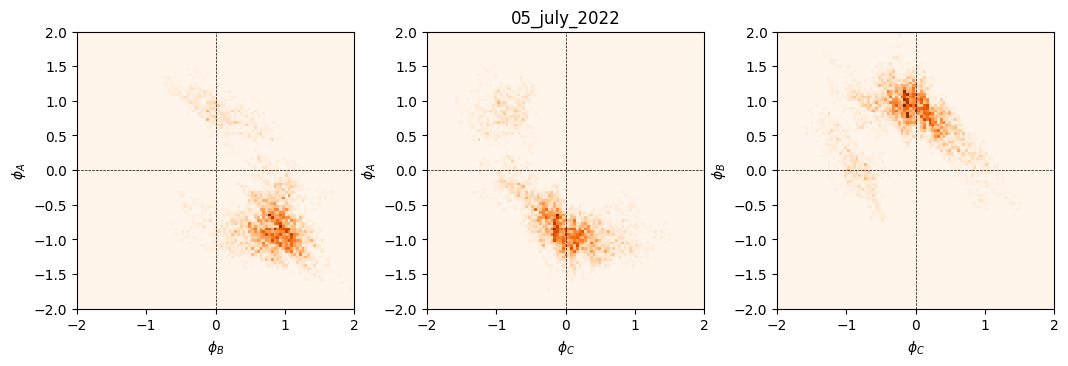

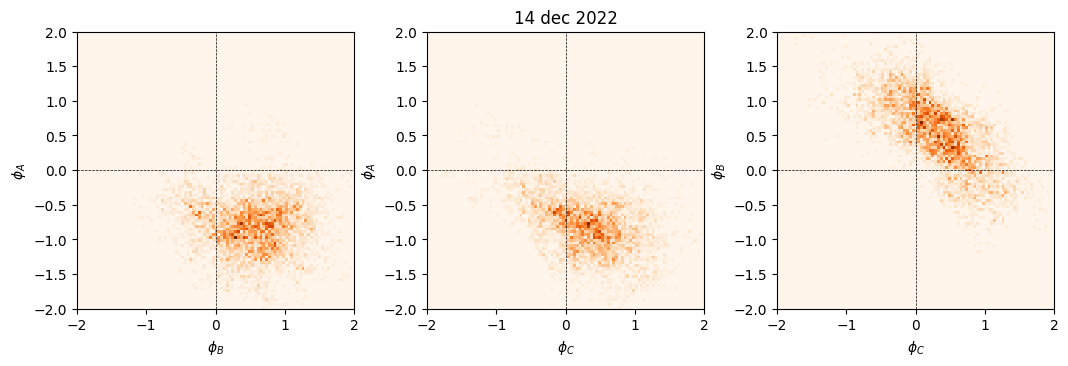

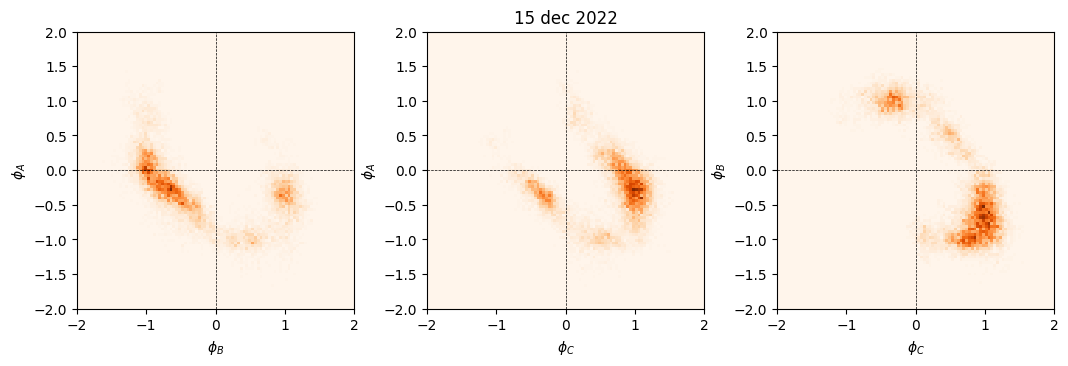

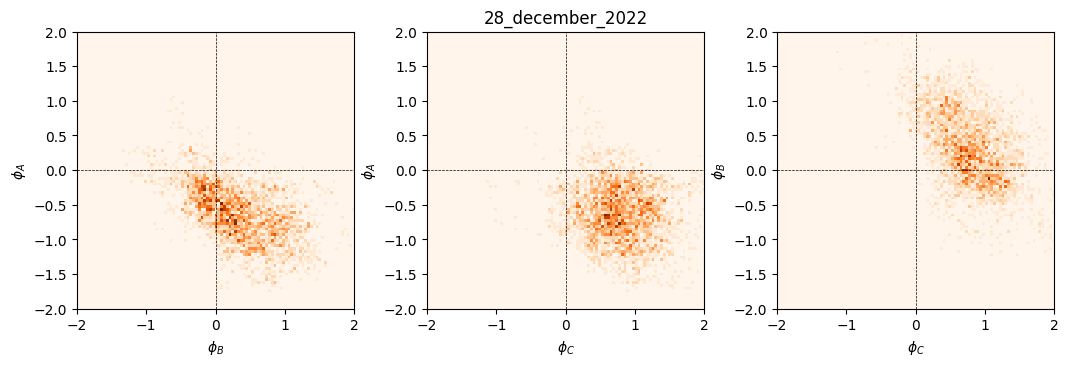

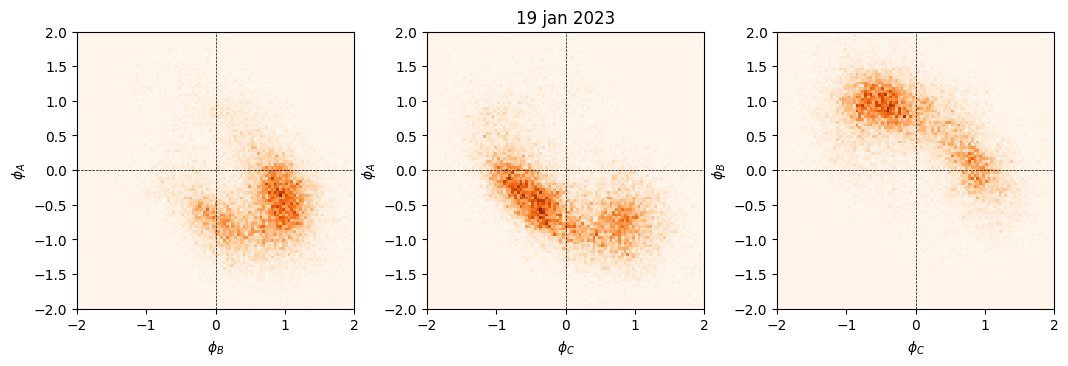

In [43]:
### 1.3 Each day

window_size = 100 # frames, 1 frame = 0.5 s


# colors = plt.cm.get_cmap("tab10")
# video_colors = plt.cm.get_cmap("winter", len(files))



lim = 2

for date in dates:
    fr_list = []
    folder = os.path.join(main_folder, date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

    combined = pd.concat(fr_list)

    fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100)
    for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
        H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
        ax[num].imshow(H, interpolation='nearest', origin='lower',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
        ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
        ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
        ax[num].set_xlim([-lim, lim])
        ax[num].set_ylim([-lim, lim])
        ax[num].set_xlabel("$\phi_{}$".format(i2))
        ax[num].set_ylabel("$\phi_{}$".format(i1))
    ax[1].set_title(date)

## 2 model_02_S

In [7]:
dates = ["31 jan 2023"]

In [8]:
# some statistics

for date in dates:
    folder = os.path.join(r"A:\SYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        total += len(flowrate)
    print("{0}: {1:d} videos, {2:d} points".format(date, num+1, total))

31 jan 2023: 6 videos, 21594 points


### 3-panel histograms

We want to compare the flow histogram with theoretical energy landscapes. The predictions is conveniently visualized in 2D histograms. For our 3-channel bifurcation experiment, 3 histograms can be made, namely (A, B), (A, C) and (B, C). In this section, we implement the code that plot these 3 histograms in 3 panels. We term this type of visualization "3-panel histograms".


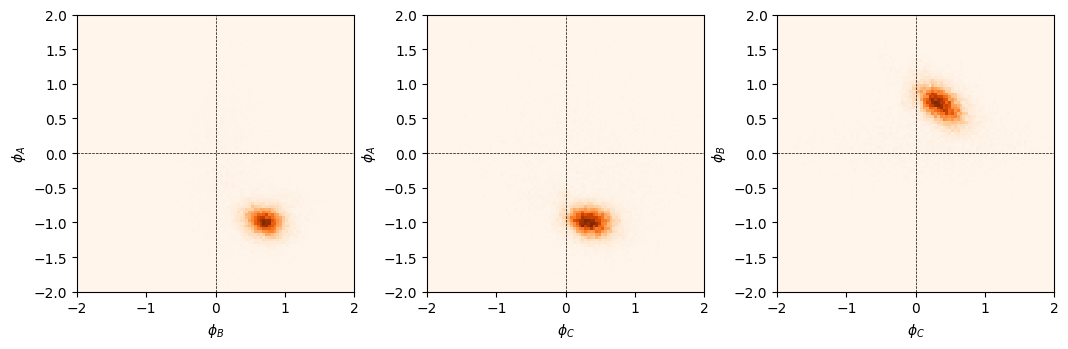

In [9]:
window_size = 100 # frames, 1 frame = 0.5 s


# colors = plt.cm.get_cmap("tab10")
# video_colors = plt.cm.get_cmap("winter", len(files))

fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100)
fr_list = []
lim = 2

for date in dates:
    folder = os.path.join(r"A:\SYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
    H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
    ax[num].imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
    ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax[num].set_xlim([-lim, lim])
    ax[num].set_ylim([-lim, lim])
    ax[num].set_xlabel("$\phi_{}$".format(i2))
    ax[num].set_ylabel("$\phi_{}$".format(i1))

###  1-panel histogram

A single combination between two channels does not recover the predicted ellipse. It might look better if we superpose all the 3 possible combinations. We will try (A, B), (B, C), (C, A).

Text(0, 0.5, '$\\phi_2$')

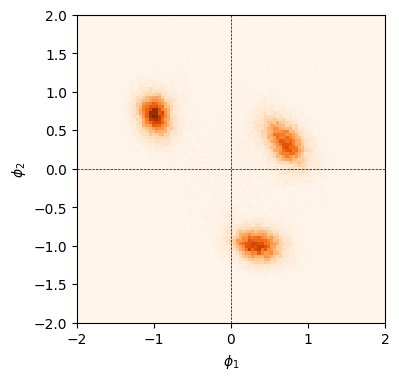

In [10]:
lim = 2
one_panel_list = []
for i1, i2 in (("C", "B"), ("B", "A"), ("A", "C")):
    tmp = pd.DataFrame()
    tmp["phi-1"] = combined[i1] / combined["normalizer"]
    tmp["phi-2"] = combined[i2] / combined["normalizer"]
    one_panel_list.append(tmp)
one_panel = pd.concat(one_panel_list)

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
H, xedges, yedges = np.histogram2d(one_panel["phi-1"], one_panel["phi-2"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax.imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.set_xlabel("$\phi_{}$".format(1))
ax.set_ylabel("$\phi_{}$".format(2))

## 3 model_03_S

In [11]:
dates = ["01 feb 2023"]

In [12]:
# some statistics

for date in dates:
    folder = os.path.join(r"A:\SYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        total += len(flowrate)
    print("{0}: {1:d} videos, {2:d} points".format(date, num+1, total))

01 feb 2023: 9 videos, 29393 points


### 3-panel histograms

We want to compare the flow histogram with theoretical energy landscapes. The predictions is conveniently visualized in 2D histograms. For our 3-channel bifurcation experiment, 3 histograms can be made, namely (A, B), (A, C) and (B, C). In this section, we implement the code that plot these 3 histograms in 3 panels. We term this type of visualization "3-panel histograms".


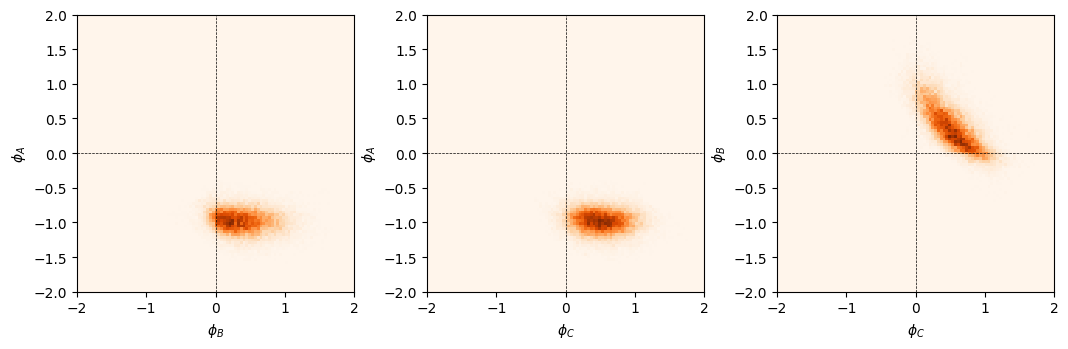

In [13]:
window_size = 100 # frames, 1 frame = 0.5 s


# colors = plt.cm.get_cmap("tab10")
# video_colors = plt.cm.get_cmap("winter", len(files))

fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100)
fr_list = []
lim = 2

for date in dates:
    folder = os.path.join(r"A:\SYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
    H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
    ax[num].imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
    ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax[num].set_xlim([-lim, lim])
    ax[num].set_ylim([-lim, lim])
    ax[num].set_xlabel("$\phi_{}$".format(i2))
    ax[num].set_ylabel("$\phi_{}$".format(i1))

## 4 model_04_L

In [44]:
dates = ["10_july_2022_E1", "10_july_2022_E2", "10_july_2022_E2", "28_december_2022"]

In [45]:
# some statistics

for date in dates:
    folder = os.path.join(r"A:\ASYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        total += len(flowrate)
    print("{0}: {1:d} videos, {2:d} points".format(date, num+1, total))

10_july_2022_E1: 10 videos, 5740 points
10_july_2022_E2: 13 videos, 7462 points
10_july_2022_E2: 13 videos, 7462 points
28_december_2022: 8 videos, 4800 points


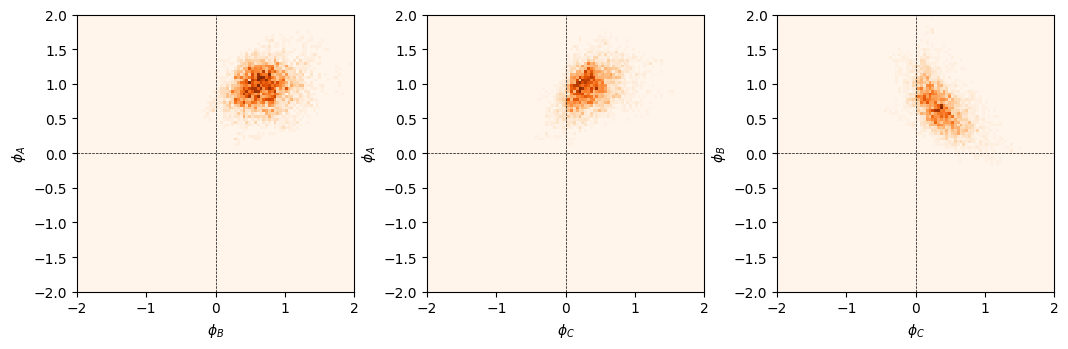

In [17]:
window_size = 100 # frames, 1 frame = 0.5 s


# colors = plt.cm.get_cmap("tab10")
# video_colors = plt.cm.get_cmap("winter", len(files))

fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100)
fr_list = []
lim = 2

for date in dates:
    folder = os.path.join(r"A:\ASYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
    H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
    ax[num].imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
    ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax[num].set_xlim([-lim, lim])
    ax[num].set_ylim([-lim, lim])
    ax[num].set_xlabel("$\phi_{}$".format(i2))
    ax[num].set_ylabel("$\phi_{}$".format(i1))

NOTE: This data currently does not comply with the new positive direction definition!

## 6 model_06_L

In [46]:
dates = ["07 feb 2023"]

In [47]:
# some statistics

for date in dates:
    folder = os.path.join(r"A:\ASYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        total += len(flowrate)
    print("{0}: {1:d} videos, {2:d} points".format(date, num+1, total))

07 feb 2023: 9 videos, 30050 points


### 3-panel histograms

We want to compare the flow histogram with theoretical energy landscapes. The predictions is conveniently visualized in 2D histograms. For our 3-channel bifurcation experiment, 3 histograms can be made, namely (A, B), (A, C) and (B, C). In this section, we implement the code that plot these 3 histograms in 3 panels. We term this type of visualization "3-panel histograms".


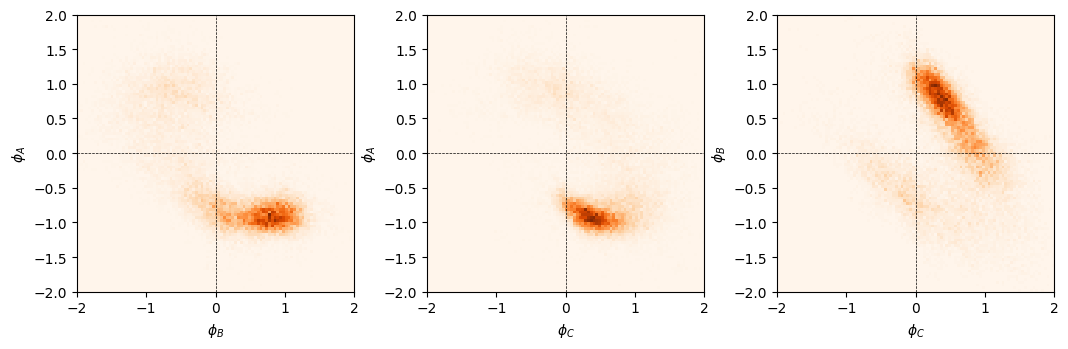

In [48]:
window_size = 100 # frames, 1 frame = 0.5 s


# colors = plt.cm.get_cmap("tab10")
# video_colors = plt.cm.get_cmap("winter", len(files))

fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100)
fr_list = []
lim = 2

for date in dates:
    folder = os.path.join(r"A:\ASYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
    H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
    ax[num].imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
    ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax[num].set_xlim([-lim, lim])
    ax[num].set_ylim([-lim, lim])
    ax[num].set_xlabel("$\phi_{}$".format(i2))
    ax[num].set_ylabel("$\phi_{}$".format(i1))

Text(0, 0.5, '$\\phi_1$')

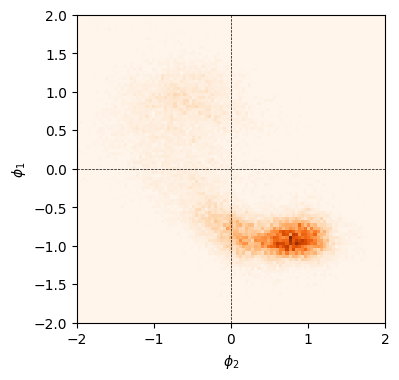

In [49]:
window_size = 100 # frames, 1 frame = 0.5 s


# colors = plt.cm.get_cmap("tab10")
# video_colors = plt.cm.get_cmap("winter", len(files))

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
fr_list = []
lim = 2

for date in dates:
    folder = os.path.join(r"A:\ASYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate.dropna(inplace=True)
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)


H, xedges, yedges = np.histogram2d(combined["A"]/combined["normalizer"], combined["B"]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
ax.imshow(H, interpolation='nearest', origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.set_xlabel("$\phi_{}$".format("2"))
ax.set_ylabel("$\phi_{}$".format("1"))

## 7 model_07_A (angle)

In [50]:
dates = ["08 feb 2023"]

In [51]:
# some statistics

for date in dates:
    folder = os.path.join(r"A:\ASYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        total += len(flowrate)
    print("{0}: {1:d} videos, {2:d} points".format(date, num+1, total))

08 feb 2023: 14 videos, 50386 points


### 3-panel histograms

We want to compare the flow histogram with theoretical energy landscapes. The predictions is conveniently visualized in 2D histograms. For our 3-channel bifurcation experiment, 3 histograms can be made, namely (A, B), (A, C) and (B, C). In this section, we implement the code that plot these 3 histograms in 3 panels. We term this type of visualization "3-panel histograms".


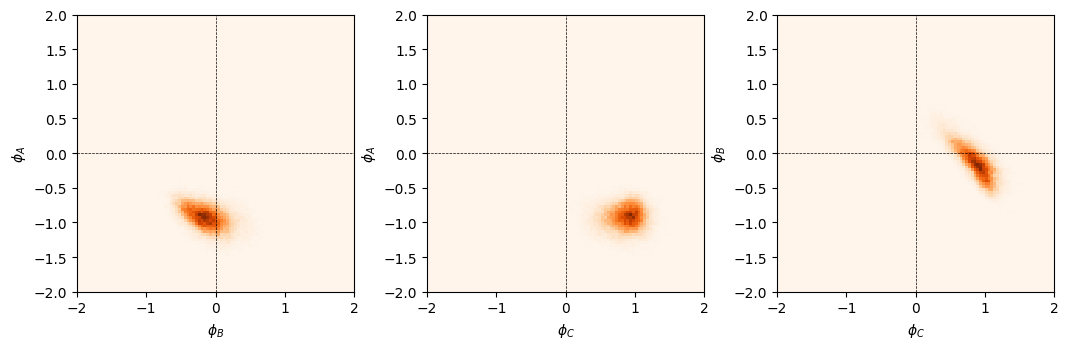

In [52]:
window_size = 100 # frames, 1 frame = 0.5 s


# colors = plt.cm.get_cmap("tab10")
# video_colors = plt.cm.get_cmap("winter", len(files))

fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100)
fr_list = []
lim = 2

for date in dates:
    folder = os.path.join(r"A:\ASYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
    H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
    ax[num].imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
    ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax[num].set_xlim([-lim, lim])
    ax[num].set_ylim([-lim, lim])
    ax[num].set_xlabel("$\phi_{}$".format(i2))
    ax[num].set_ylabel("$\phi_{}$".format(i1))

## 9 model_09_A

In [53]:
dates = ["10 feb 2023"]

In [54]:
# some statistics

for date in dates:
    folder = os.path.join(r"A:\ASYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    total = 0
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        total += len(flowrate)
    print("{0}: {1:d} videos, {2:d} points".format(date, num+1, total))

10 feb 2023: 5 videos, 17995 points


### 3-panel histograms

We want to compare the flow histogram with theoretical energy landscapes. The predictions is conveniently visualized in 2D histograms. For our 3-channel bifurcation experiment, 3 histograms can be made, namely (A, B), (A, C) and (B, C). In this section, we implement the code that plot these 3 histograms in 3 panels. We term this type of visualization "3-panel histograms".


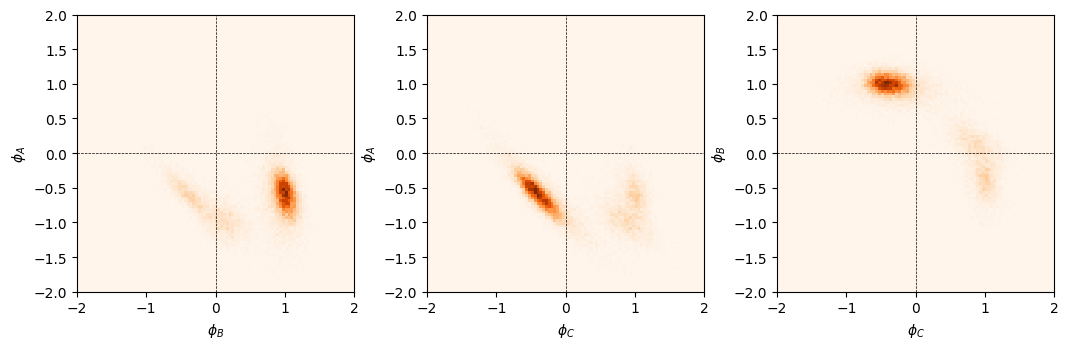

In [55]:
window_size = 100 # frames, 1 frame = 0.5 s


# colors = plt.cm.get_cmap("tab10")
# video_colors = plt.cm.get_cmap("winter", len(files))

fig, ax = plt.subplots(ncols=3, figsize=(12.8, 3.6), dpi=100)
fr_list = []
lim = 2

for date in dates:
    folder = os.path.join(r"A:\ASYMMETRIC", date, "Flow_rate")
    l = readdata(folder, "csv")
    for num, i in l.iterrows():
        flowrate = pd.read_csv(i.Dir)
        flowrate["normalizer"] = uniform_filter1d(flowrate[["A", "B", "C"]].abs().max(axis=1), size=window_size, axis=0)
        flowrate = flowrate.loc[flowrate.normalizer>100]
        fr_list.append(flowrate)

combined = pd.concat(fr_list)

for num, i1, i2 in ((0, "A", "B"), (1, "A", "C"), (2, "B", "C")):
    H, xedges, yedges = np.histogram2d(combined[i1]/combined["normalizer"], combined[i2]/combined["normalizer"], bins=(np.linspace(-lim, lim, 100), np.linspace(-lim, lim, 100)))
    ax[num].imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Oranges")
    ax[num].plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax[num].plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax[num].set_xlim([-lim, lim])
    ax[num].set_ylim([-lim, lim])
    ax[num].set_xlabel("$\phi_{}$".format(i2))
    ax[num].set_ylabel("$\phi_{}$".format(i1))